In [1]:
import pandas as pd
import numpy as np

In [2]:
data={"grammer":["Python","C","Java","GO",np.nan,"SQL","PHP","Python"],
     "score":[1,2,np.nan,4,5,6,7,10]}

#### 1. 字典建DataFrame

In [3]:
df=pd.DataFrame(data)
df.append([{"grammer":"Python"}])

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0
0,Python,NaN


#### 2. 找到含有“Python”的行

In [8]:
df['grammer'].str.find('O')

0   -1.0
1   -1.0
2   -1.0
3    1.0
4    NaN
5   -1.0
6   -1.0
7   -1.0
Name: grammer, dtype: float64

In [12]:
df[df['grammer'].str.contains('Python').fillna(False)]

,grammer,score
0,Python,1.0
7,Python,10.0


#### 3. 输出所有列名

In [14]:
list(df.columns)

['grammer', 'score']

#### 4. 修改第二列名称为“popularity”

In [5]:
df.rename(columns={"score":"popularity"},inplace=True)
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


#### 5. 统计grammer列中每种编程语言出现的次数

In [20]:
df['grammer'].value_counts()

Python    2
GO        1
PHP       1
SQL       1
Java      1
C         1
Name: grammer, dtype: int64

#### 6. 将空值用上下值的平均值填充

In [26]:
data2={"grammer":["Python","C","Java","GO",np.nan,"SQL","PHP","Python"],
     "score":[1,2,np.nan,4,5,6,np.nan,10]}
df2=pd.DataFrame(data2)
df2.rename(columns={"score":"popularity"},inplace=True)
df2['popularity'].interpolate(method="linear")

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     8.0
7    10.0
Name: popularity, dtype: float64

In [33]:
df2['popularity'].fillna(df2['popularity'].interpolate(method="linear"),inplace=True)
df2

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,8.0
7,Python,10.0


#### 7. 提取popularity列中值大于3的行

In [27]:
df[df['popularity']>3]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


#### 8. grammer列进行去除重复值

In [35]:
df['grammer'].unique()

array(['Python', 'C', 'Java', 'GO', nan, 'SQL', 'PHP'], dtype=object)

In [36]:
df.drop_duplicates()

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [37]:
df.drop_duplicates(subset='grammer')

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0


#### 9. 计算popularity平均值

In [38]:
df['popularity'].mean()

5.0

#### 10. 将grammar列转换为list

In [41]:
df['grammer'].to_list()

['Python', 'C', 'Java', 'GO', nan, 'SQL', 'PHP', 'Python']

#### 11. 将DataFrame保存为Excel

In [7]:
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [10]:
df.to_excel("Test.xlsx",sheet_name="test",index=False)

#### 12. 查看数据行列数

In [11]:
df.shape

(8, 2)

#### 13. 大于3小于7的行

In [14]:
df[(df['popularity']>3)&(df['popularity']<7)]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0


#### 14. 交换两列位置

In [23]:
df.columns[[0]]

Index(['grammer'], dtype='object')

In [24]:
df.columns[[1,0]]

Index(['popularity', 'grammer'], dtype='object')

In [25]:
df[['popularity','grammer']]

,popularity,grammer
0,1.0,Python
1,2.0,C
2,NaN,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [26]:
df[df.columns[[1,0]]]

,popularity,grammer
0,1.0,Python
1,2.0,C
2,NaN,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


#### 15. 删除一列

In [27]:
temp=df['popularity']
df.drop(['popularity'],axis=1)

,grammer
0,Python
1,C
2,Java
3,GO
4,NaN
5,SQL
6,PHP
7,Python


#### 16. 插入一列

In [44]:
temp=df['popularity']
df.insert(loc=1,column='insertcol1',value=999)
df.insert(loc=1,column='insertcol2',value=temp)
df

,grammer,insertcol2,insertcol1,popularity
0,Python,1.0,999,1.0
1,C,2.0,999,2.0
2,Java,NaN,999,NaN
3,GO,4.0,999,4.0
4,NaN,5.0,999,5.0
5,SQL,6.0,999,6.0
6,PHP,7.0,999,7.0
7,Python,10.0,999,10.0


#### 17. 提取popularity列的最大值行

In [46]:
df[df['popularity']==df['popularity'].max()]

,grammer,insertcol2,insertcol1,popularity
7,Python,10.0,999,10.0


#### 18. 查看最后5行

In [7]:
df.tail()

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


#### 19. 删除最后一行

In [8]:
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [9]:
len(df)

8

In [10]:
df.drop(len(df)-1)

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0


#### 20. 添加一行数据

In [12]:
row=pd.DataFrame({'grammer':['Perl'],'popularity':[6.6]})
row

,grammer,popularity
0,Perl,6.6


In [21]:
pd.concat([df,row],join='outer',ignore_index=True)

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0
8,Perl,6.6


In [23]:
df.append(row,ignore_index=False)

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0
0,Perl,6.6


#### 21. 对‘popularity’列的值进行排序

In [29]:
df.sort_values(by='popularity',axis=0,ascending=False)
df.sort_values(by='popularity',axis=0,ascending=True)

,grammer,popularity
7,Python,10.0
6,PHP,7.0
5,SQL,6.0
4,NaN,5.0
3,GO,4.0
1,C,2.0
0,Python,1.0
2,Java,NaN


#### 22. 统计grammar列每个字符串的长度

In [40]:
df['grammer']=df['grammer'].fillna('R')
df['grammer'].apply(lambda x:len(x))

0    6
1    1
2    4
3    2
4    1
5    3
6    3
7    6
Name: grammer, dtype: int64

#### 23. 读excel

In [2]:
df=pd.read_excel('C:/Users/User/Desktop/Pandas200.xlsx',engine='openpyxl')
df

,create Time,education,salary
0,2020/3/6 21:51:59,本科,15k-23k
1,2020/3/6 20:32:02,本科,16k-28k
2,2020/3/6 19:49:42,不限,15k-26k
3,2020/3/6 16:28:33,本科,19k-29k
4,2020/3/6 22:35:41,本科,15k-22k
...,...,...,...
94,2020/3/6 13:14:23,本科,17k-28k
95,2020/3/6 18:50:29,本科,16k-21k
96,2020/3/6 18:14:03,硕士,14k-28k
97,2020/3/6 18:12:56,本科,19k-22k


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   create Time  99 non-null     object
 1   education    99 non-null     object
 2   salary       99 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


#### 24. 将salary列转换为最大值与最小值的平均值

In [46]:
df['salary'].str.split('-')

0     [15k, 23k]
1     [16k, 28k]
2     [15k, 26k]
3     [19k, 29k]
4     [15k, 22k]
         ...    
94    [17k, 28k]
95    [16k, 21k]
96    [14k, 28k]
97    [19k, 22k]
98    [18k, 27k]
Name: salary, Length: 99, dtype: object

##### 第一行数据处理范例

In [52]:
temp=df['salary'].str.split('-')
temp[0][0].strip('k')

'15'

In [54]:
smin=int(temp[0][0].strip('k'))
smin

15

In [55]:
smax=int(temp[0][1].strip('k'))
smax

23

In [61]:
savg=(smin+smax)/2*1000
savg

19000.0

##### 函数化后

In [3]:
df['salary'].str.split('-').apply(lambda x:(int(x[0].strip('k'))+int(x[1].strip('k')))/2*1000)

0     19000.0
1     22000.0
2     20500.0
3     24000.0
4     18500.0
       ...   
94    22500.0
95    18500.0
96    21000.0
97    20500.0
98    22500.0
Name: salary, Length: 99, dtype: float64

In [4]:
df['salary']=df['salary'].str.split('-').apply(lambda x:(int(x[0].strip('k'))+int(x[1].strip('k')))/2*1000)

In [5]:
df

,create Time,education,salary
0,2020/3/6 21:51:59,本科,19000.0
1,2020/3/6 20:32:02,本科,22000.0
2,2020/3/6 19:49:42,不限,20500.0
3,2020/3/6 16:28:33,本科,24000.0
4,2020/3/6 22:35:41,本科,18500.0
...,...,...,...
94,2020/3/6 13:14:23,本科,22500.0
95,2020/3/6 18:50:29,本科,18500.0
96,2020/3/6 18:14:03,硕士,21000.0
97,2020/3/6 18:12:56,本科,20500.0


#### 25. 将数据根据学历分组并计算平均薪资

In [74]:
df.groupby(by=['education']).mean()

,salary
education,
不限,19250.000000
本科,19915.662651
硕士,20125.000000


#### 26. 将create time列转换为月-日

In [82]:
pd.to_datetime(df['create Time']).apply(lambda x:x.strftime('%m-%d'))

0     03-06
1     03-06
2     03-06
3     03-06
4     03-06
      ...  
94    03-06
95    03-06
96    03-06
97    03-06
98    03-06
Name: create Time, Length: 99, dtype: object

#### 27.查看数值型列的汇总统计

In [6]:
df.describe()

,salary
count,99.000000
mean,19914.141414
std,2216.635164
min,15000.000000
25%,18500.000000
50%,20000.000000
75%,21250.000000
max,25000.000000


#### 28.新增一列标签根据salary将数据分为三组

In [16]:
bins=[0,5000,10000,20000,25000]
group_names=['低','中','高','极高']
df['categories']=pd.cut(x=df['salary'],bins=bins,labels=group_names)

In [17]:
df

,create Time,education,salary,categories
0,2020/3/6 21:51:59,本科,19000.0,高
1,2020/3/6 20:32:02,本科,22000.0,极高
2,2020/3/6 19:49:42,不限,20500.0,极高
3,2020/3/6 16:28:33,本科,24000.0,极高
4,2020/3/6 22:35:41,本科,18500.0,高
...,...,...,...,...
94,2020/3/6 13:14:23,本科,22500.0,极高
95,2020/3/6 18:50:29,本科,18500.0,高
96,2020/3/6 18:14:03,硕士,21000.0,极高
97,2020/3/6 18:12:56,本科,20500.0,极高


#### 29. 取出第33行数据

In [24]:
df.iloc[33,[1,2,3]]

education        本科
salary        20000
categories        高
Name: 33, dtype: object

In [26]:
df.loc[33,['education','salary','categories']]

education        本科
salary        20000
categories        高
Name: 33, dtype: object

#### 30. 计算salary中位数

In [28]:
df['salary'].median()

20000.0

In [29]:
np.median(df['salary'])

20000.0

#### 31. 绘制薪资水平直方图

array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

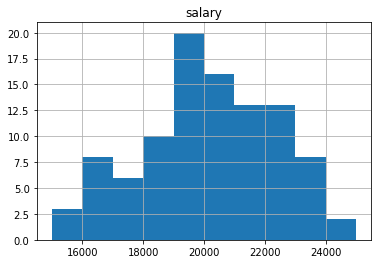

In [39]:
df.hist(column=['salary'])

array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

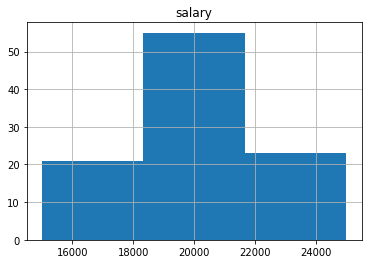

In [40]:
df.hist(column=['salary'],bins=3)

array([[<AxesSubplot:title={'center':'低'}>,
        <AxesSubplot:title={'center':'中'}>],
       [<AxesSubplot:title={'center':'高'}>,
        <AxesSubplot:title={'center':'极高'}>]], dtype=object)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20302 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20302 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\AppData\Roaming\Python\Pytho

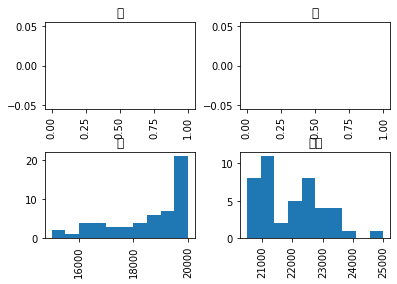

In [38]:
df.hist(by=df['categories'])

#### 32. 绘制薪资水平密度图

<AxesSubplot:ylabel='Density'>

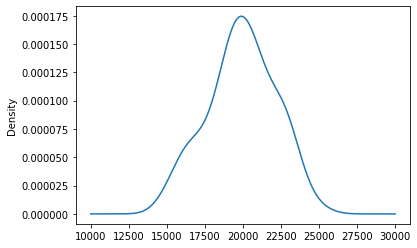

In [42]:
df.salary.plot.kde()

#### 33. 删除最后一列

In [43]:
df.drop(['categories'],axis=1)

,create Time,education,salary
0,2020/3/6 21:51:59,本科,19000.0
1,2020/3/6 20:32:02,本科,22000.0
2,2020/3/6 19:49:42,不限,20500.0
3,2020/3/6 16:28:33,本科,24000.0
4,2020/3/6 22:35:41,本科,18500.0
...,...,...,...
94,2020/3/6 13:14:23,本科,22500.0
95,2020/3/6 18:50:29,本科,18500.0
96,2020/3/6 18:14:03,硕士,21000.0
97,2020/3/6 18:12:56,本科,20500.0


#### 34.将第一列与第二列合并为新的一列

In [44]:
df

,create Time,education,salary,categories
0,2020/3/6 21:51:59,本科,19000.0,高
1,2020/3/6 20:32:02,本科,22000.0,极高
2,2020/3/6 19:49:42,不限,20500.0,极高
3,2020/3/6 16:28:33,本科,24000.0,极高
4,2020/3/6 22:35:41,本科,18500.0,高
...,...,...,...,...
94,2020/3/6 13:14:23,本科,22500.0,极高
95,2020/3/6 18:50:29,本科,18500.0,高
96,2020/3/6 18:14:03,硕士,21000.0,极高
97,2020/3/6 18:12:56,本科,20500.0,极高


In [46]:
df.iloc[:,0]+df.iloc[:,1]

0     2020/3/6 21:51:59本科
1     2020/3/6 20:32:02本科
2     2020/3/6 19:49:42不限
3     2020/3/6 16:28:33本科
4     2020/3/6 22:35:41本科
             ...         
94    2020/3/6 13:14:23本科
95    2020/3/6 18:50:29本科
96    2020/3/6 18:14:03硕士
97    2020/3/6 18:12:56本科
98    2020/3/6 20:13:56本科
Length: 99, dtype: object

#### 35.将salary列转为文本格式

In [48]:
df['salary'].map(str)

0     19000.0
1     22000.0
2     20500.0
3     24000.0
4     18500.0
       ...   
94    22500.0
95    18500.0
96    21000.0
97    20500.0
98    22500.0
Name: salary, Length: 99, dtype: object

In [49]:
df['salary'].astype(str)

0     19000.0
1     22000.0
2     20500.0
3     24000.0
4     18500.0
       ...   
94    22500.0
95    18500.0
96    21000.0
97    20500.0
98    22500.0
Name: salary, Length: 99, dtype: object

#### 36.计算salary最大值与最小值之差
##### *df[['列']]这种写法会让apply方法认为df[['列']]作为一个DataFrame整体来处理*

In [54]:
df[['salary']].apply(lambda x:x.max()-x.min())

salary    10000.0
dtype: float64

In [52]:
df['salary'].max()

25000.0

In [53]:
df[['salary']]

,salary
0,19000.0
1,22000.0
2,20500.0
3,24000.0
4,18500.0
...,...
94,22500.0
95,18500.0
96,21000.0
97,20500.0


#### 37. 将第一行与最后一行拼接

In [79]:
pd.concat([df.iloc[[0]],df.iloc[[-1]]])

,create Time,education,salary,categories
0,2020/3/6 21:51:59,本科,19000.0,高
98,2020/3/6 20:13:56,本科,22500.0,极高


In [82]:
df.iloc[-1:]

,create Time,education,salary,categories
98,2020/3/6 20:13:56,本科,22500.0,极高


In [84]:
df.iloc[0:5]

,create Time,education,salary,categories
0,2020/3/6 21:51:59,本科,19000.0,高
1,2020/3/6 20:32:02,本科,22000.0,极高
2,2020/3/6 19:49:42,不限,20500.0,极高
3,2020/3/6 16:28:33,本科,24000.0,极高
4,2020/3/6 22:35:41,本科,18500.0,高


#### 38.显示每一列的数据类型

In [85]:
df.dtypes

create Time      object
education        object
salary          float64
categories     category
dtype: object

#### 39. 将create time设置为索引

In [87]:
df_copy=df.copy()

In [95]:
df_copy=df_copy.set_index(keys='create Time')

In [96]:
df_copy

,education,salary,categories
create Time,,,
2020/3/6 21:51:59,本科,19000.0,高
2020/3/6 20:32:02,本科,22000.0,极高
2020/3/6 19:49:42,不限,20500.0,极高
2020/3/6 16:28:33,本科,24000.0,极高
2020/3/6 22:35:41,本科,18500.0,高
...,...,...,...
2020/3/6 13:14:23,本科,22500.0,极高
2020/3/6 18:50:29,本科,18500.0,高
2020/3/6 18:14:03,硕士,21000.0,极高


In [98]:
df_copy.loc[['2020/3/6 21:51:59']]

,education,salary,categories
create Time,,,
2020/3/6 21:51:59,本科,19000.0,高


#### 40.生成一个和df长度相同的随机数DataFrame


In [100]:
np.random.randint(low=1,high=10,size=99)

array([4, 3, 9, 7, 1, 9, 4, 4, 2, 1, 3, 8, 6, 9, 4, 5, 7, 5, 2, 2, 1, 5,
       2, 9, 4, 9, 7, 3, 4, 4, 6, 6, 7, 4, 2, 7, 1, 6, 2, 7, 2, 6, 2, 9,
       4, 9, 6, 9, 7, 3, 4, 9, 9, 5, 5, 5, 6, 2, 7, 8, 8, 6, 5, 8, 2, 6,
       8, 2, 3, 4, 3, 5, 4, 6, 9, 9, 3, 4, 7, 2, 6, 9, 2, 3, 1, 5, 5, 8,
       3, 3, 4, 4, 7, 8, 7, 8, 3, 1, 5])

In [102]:
pd.Series(np.random.randint(low=1,high=10,size=99),name='random')

0     4
1     1
2     9
3     6
4     5
     ..
94    2
95    8
96    2
97    3
98    7
Name: random, Length: 99, dtype: int32

In [103]:
pd.DataFrame(pd.Series(np.random.randint(low=1,high=10,size=99),name='random'))

,random
0,3
1,1
2,5
3,4
4,3
...,...
94,9
95,8
96,5
97,3


#### 41. random列与之前的df进行合并

In [104]:
df

,create Time,education,salary,categories
0,2020/3/6 21:51:59,本科,19000.0,高
1,2020/3/6 20:32:02,本科,22000.0,极高
2,2020/3/6 19:49:42,不限,20500.0,极高
3,2020/3/6 16:28:33,本科,24000.0,极高
4,2020/3/6 22:35:41,本科,18500.0,高
...,...,...,...,...
94,2020/3/6 13:14:23,本科,22500.0,极高
95,2020/3/6 18:50:29,本科,18500.0,高
96,2020/3/6 18:14:03,硕士,21000.0,极高
97,2020/3/6 18:12:56,本科,20500.0,极高


In [105]:
df_random=pd.DataFrame(pd.Series(np.random.randint(low=1,high=10,size=99),name='random'))

In [108]:
df=pd.concat([df,df_random],axis=1)

In [109]:
df

,create Time,education,salary,categories,random
0,2020/3/6 21:51:59,本科,19000.0,高,1
1,2020/3/6 20:32:02,本科,22000.0,极高,2
2,2020/3/6 19:49:42,不限,20500.0,极高,6
3,2020/3/6 16:28:33,本科,24000.0,极高,2
4,2020/3/6 22:35:41,本科,18500.0,高,9
...,...,...,...,...,...
94,2020/3/6 13:14:23,本科,22500.0,极高,6
95,2020/3/6 18:50:29,本科,18500.0,高,4
96,2020/3/6 18:14:03,硕士,21000.0,极高,6
97,2020/3/6 18:12:56,本科,20500.0,极高,6


#### 42. 生成新的一列new为salary减去random列

In [110]:
df['New']=df['salary']-df['random']

In [111]:
df

,create Time,education,salary,categories,random,New
0,2020/3/6 21:51:59,本科,19000.0,高,1,18999.0
1,2020/3/6 20:32:02,本科,22000.0,极高,2,21998.0
2,2020/3/6 19:49:42,不限,20500.0,极高,6,20494.0
3,2020/3/6 16:28:33,本科,24000.0,极高,2,23998.0
4,2020/3/6 22:35:41,本科,18500.0,高,9,18491.0
...,...,...,...,...,...,...
94,2020/3/6 13:14:23,本科,22500.0,极高,6,22494.0
95,2020/3/6 18:50:29,本科,18500.0,高,4,18496.0
96,2020/3/6 18:14:03,硕士,21000.0,极高,6,20994.0
97,2020/3/6 18:12:56,本科,20500.0,极高,6,20494.0


#### 43.检查数据中是否含有缺失值

In [126]:
(df['salary']>15000).values.any()

True

In [127]:
df.isnull().values.any()

False

#### 44.将salary列类型转换为浮点数

In [129]:
df['salary'].astype(float)

0     19000.0
1     22000.0
2     20500.0
3     24000.0
4     18500.0
       ...   
94    22500.0
95    18500.0
96    21000.0
97    20500.0
98    22500.0
Name: salary, Length: 99, dtype: float64

#### 45.计算salary大于15000的次数

In [132]:
len(df[df['salary']>15000])

97

#### 46.查看education列有几种学历,及出现次数

In [133]:
df['education'].value_counts()

本科    83
硕士    12
不限     4
Name: education, dtype: int64

In [134]:
df['education'].unique()

array(['本科', '不限', '硕士'], dtype=object)

#### 47.提取salary与new列和大于30000的最后三行

In [150]:
#第一种方法

In [136]:
rowsum=df['salary']+df['New']

In [169]:
df[rowsum>30000].iloc[-3:]

,create Time,education,salary,categories,random,New
96,2020/3/6 18:14:03,硕士,21000.0,极高,6,20994.0
97,2020/3/6 18:12:56,本科,20500.0,极高,6,20494.0
98,2020/3/6 20:13:56,本科,22500.0,极高,4,22496.0


In [151]:
#第二种方法

In [156]:
df_sum=df[['salary','New']]

In [157]:
df_sum

,salary,New
0,19000.0,18999.0
1,22000.0,21998.0
2,20500.0,20494.0
3,24000.0,23998.0
4,18500.0,18491.0
...,...,...
94,22500.0,22494.0
95,18500.0,18496.0
96,21000.0,20994.0
97,20500.0,20494.0


In [158]:
rowsum2=df_sum.apply(np.sum,axis=1)

In [159]:
rowsum2

0     37999.0
1     43998.0
2     40994.0
3     47998.0
4     36991.0
       ...   
94    44994.0
95    36996.0
96    41994.0
97    40994.0
98    44996.0
Length: 99, dtype: float64

In [174]:
np.where(rowsum2>30000)[0][-3:]

array([96, 97, 98], dtype=int64)

In [170]:
df.loc[np.where(rowsum2>30000)[0][-3:]]

,create Time,education,salary,categories,random,New
96,2020/3/6 18:14:03,硕士,21000.0,极高,6,20994.0
97,2020/3/6 18:12:56,本科,20500.0,极高,6,20494.0
98,2020/3/6 20:13:56,本科,22500.0,极高,4,22496.0


In [177]:
df.loc[[1,2,3]]

,create Time,education,salary,categories,random,New
1,2020/3/6 20:32:02,本科,22000.0,极高,2,21998.0
2,2020/3/6 19:49:42,不限,20500.0,极高,6,20494.0
3,2020/3/6 16:28:33,本科,24000.0,极高,2,23998.0


#### 48.查看数据前三行

In [4]:
df_fin=pd.read_excel('C:/Users/User/Desktop/600000.SH.xls')
df_fin.head(3)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720


#### 49.查看各列缺失值情况

In [5]:
df_fin.isnull()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
327,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
df_fin.isnull().sum()

代码           1
简称           2
日期           2
前收盘价(元)      2
开盘价(元)       2
最高价(元)       2
最低价(元)       2
收盘价(元)       2
成交量(股)       2
成交金额(元)      2
涨跌(元)        2
涨跌幅(%)       2
均价(元)        2
换手率(%)       2
A股流通市值(元)    2
总市值(元)       2
A股流通股本(股)    2
市盈率          2
dtype: int64

#### 50.提取日期列含有空值的行

In [7]:
df_fin.loc[np.where(df_fin['日期'].isnull()==True)[0]]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
327,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,数据来源：Wind资讯,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_fin[df_fin['日期'].isnull()]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
327,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,数据来源：Wind资讯,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 51.输出每列缺失值具体行数

In [9]:
for col in df_fin.columns:
    if df_fin[col].count()!=len(df_fin):
        index=df_fin[col][df_fin[col].isnull()==True].index.to_list()
        print('列名:{},第{}行有缺失值'.format(col,index))
    
    

列名:代码,第[327]行有缺失值
列名:简称,第[327, 328]行有缺失值
列名:日期,第[327, 328]行有缺失值
列名:前收盘价(元),第[327, 328]行有缺失值
列名:开盘价(元),第[327, 328]行有缺失值
列名:最高价(元),第[327, 328]行有缺失值
列名:最低价(元),第[327, 328]行有缺失值
列名:收盘价(元),第[327, 328]行有缺失值
列名:成交量(股),第[327, 328]行有缺失值
列名:成交金额(元),第[327, 328]行有缺失值
列名:涨跌(元),第[327, 328]行有缺失值
列名:涨跌幅(%),第[327, 328]行有缺失值
列名:均价(元),第[327, 328]行有缺失值
列名:换手率(%),第[327, 328]行有缺失值
列名:A股流通市值(元),第[327, 328]行有缺失值
列名:总市值(元),第[327, 328]行有缺失值
列名:A股流通股本(股),第[327, 328]行有缺失值
列名:市盈率,第[327, 328]行有缺失值


In [10]:
df_fin['日期'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
324    False
325    False
326    False
327     True
328     True
Name: 日期, Length: 329, dtype: bool

#### 52.删除所有存在缺失值的行

In [11]:
df_fin.dropna(axis=0,inplace=True)

In [209]:
test=pd.DataFrame({'A':[1,2,3],'B':[5,np.nan,6]})
test

,A,B
0,1,5.0
1,2,NaN
2,3,6.0


In [210]:
test.dropna(axis=0)

,A,B
0,1,5.0
2,3,6.0


In [12]:
df_fin

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720
3,600000.SH,浦发银行,2016-01-07,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11,1.865347e+10,6.4545
4,600000.SH,浦发银行,2016-01-08,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11,1.865347e+10,6.4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,600000.SH,浦发银行,2017-05-03,15.1600,15.1600,15.1600,15.0500,15.0800,14247943,215130847,-0.0800,-0.5277,15.0991,0.0659,3.260037e+11,3.260037e+11,2.161828e+10,6.1395
323,600000.SH,浦发银行,2017-05-04,15.0800,15.0700,15.0700,14.9000,14.9800,19477788,291839737,-0.1000,-0.6631,14.9832,0.0901,3.238418e+11,3.238418e+11,2.161828e+10,6.0988
324,600000.SH,浦发银行,2017-05-05,14.9800,14.9500,14.9800,14.5200,14.9200,40194577,592160198,-0.0600,-0.4005,14.7323,0.1859,3.225447e+11,3.225447e+11,2.161828e+10,6.0744
325,600000.SH,浦发银行,2017-05-08,14.9200,14.7800,14.9000,14.5100,14.8600,43568576,638781010,-0.0600,-0.4021,14.6615,0.2015,3.212476e+11,3.212476e+11,2.161828e+10,6.0500


#### 53. 绘制收盘价折线图

In [13]:
import matplotlib.pyplot as plt

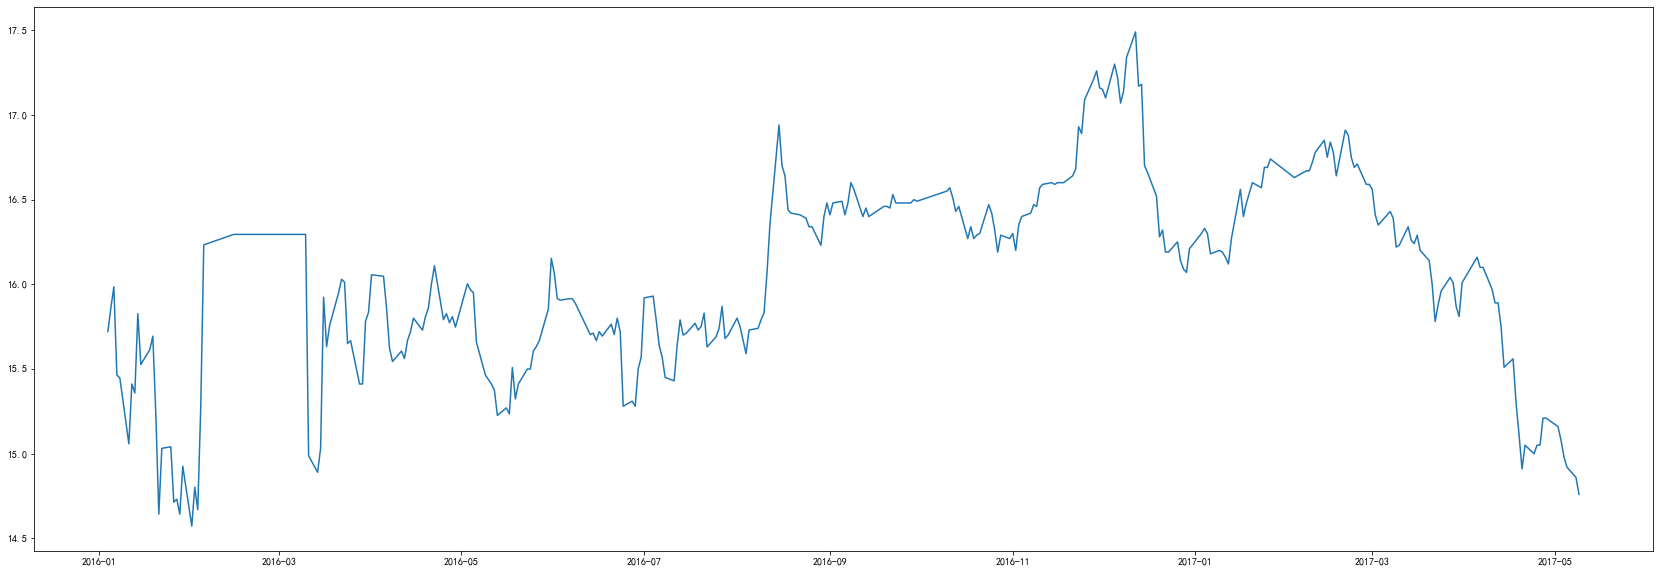

In [14]:
#plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(29,10))
#plt.xticks(color='white')
#plt.yticks(color='White')
plt.plot(df_fin['日期'],df_fin['收盘价(元)'])
plt.show()

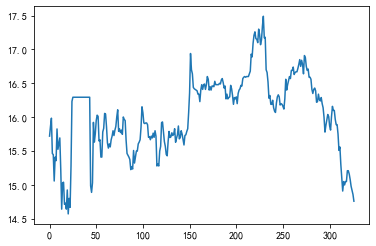

In [15]:
df_fin['收盘价(元)'].plot()
plt.show()

#### 54.同时绘制收盘价与开盘价

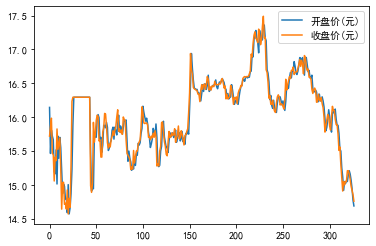

In [16]:
df_fin[['开盘价(元)','收盘价(元)']].plot()
plt.show()

#### 55. 绘制涨幅度的直方图

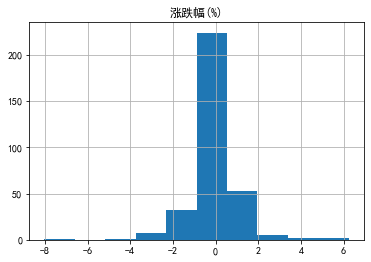

In [17]:
plt.rcParams['axes.unicode_minus']=False
df_fin.hist(column='涨跌幅(%)')
plt.show()

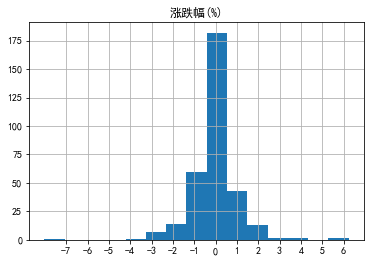

In [18]:
plt.rcParams['axes.unicode_minus']=False
df_fin.hist(column='涨跌幅(%)',bins=15)
plt.xticks([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
plt.show()

In [19]:
count,bins=np.histogram(df_fin['涨跌幅(%)'],15)

In [248]:
count

array([  1,   0,   0,   0,   1,   7,  14,  60, 182,  43,  13,   2,   2,
         0,   2], dtype=int64)

In [249]:
bins

array([-8.0217    , -7.07073333, -6.11976667, -5.1688    , -4.21783333,
       -3.26686667, -2.3159    , -1.36493333, -0.41396667,  0.537     ,
        1.48796667,  2.43893333,  3.3899    ,  4.34086667,  5.29183333,
        6.2428    ])

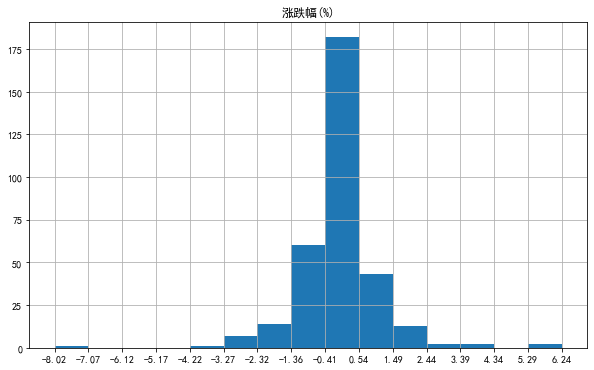

In [20]:
df_fin.hist(column='涨跌幅(%)',bins=15,figsize=(10,6))
plt.xticks(ticks=bins)
plt.show()

#### 56.以非字典的方式创建一个DataFrame

In [21]:
temp=pd.DataFrame(data=[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]],columns=df_fin.columns)
temp

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18


#### 57.提取换手率不是数值的数据，形成一个DataFrame

In [23]:
df_fin[df_fin['换手率(%)'].apply(lambda x:type(x)!=float)]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
35,600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


In [291]:
for i in range(len(df_fin)):
    if type(df_fin.iloc[i,13])!=float:
        temp=temp.append(df_fin.loc[i])
temp        

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,1,2,3,4.0000,5.0000,6.0000,7.0000,8.0000,9,10,11.0,12.0,13,14,1.500000e+01,1.600000e+01,1.700000e+01,18.000
26,600000.SH,浦发银行,2016-02-16 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,600000.SH,浦发银行,2016-02-23 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,600000.SH,浦发银行,2016-02-24 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,600000.SH,浦发银行,2016-02-25 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,600000.SH,浦发银行,2016-02-26 00:00:00,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


#### 58 设置日期为index

In [24]:
df_fin.set_index(keys='日期')

,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,
2016-01-04,600000.SH,浦发银行,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
2016-01-05,600000.SH,浦发银行,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2016-01-06,600000.SH,浦发银行,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720
2016-01-07,600000.SH,浦发银行,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11,1.865347e+10,6.4545
2016-01-08,600000.SH,浦发银行,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11,1.865347e+10,6.4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,600000.SH,浦发银行,15.1600,15.1600,15.1600,15.0500,15.0800,14247943,215130847,-0.0800,-0.5277,15.0991,0.0659,3.260037e+11,3.260037e+11,2.161828e+10,6.1395
2017-05-04,600000.SH,浦发银行,15.0800,15.0700,15.0700,14.9000,14.9800,19477788,291839737,-0.1000,-0.6631,14.9832,0.0901,3.238418e+11,3.238418e+11,2.161828e+10,6.0988
2017-05-05,600000.SH,浦发银行,14.9800,14.9500,14.9800,14.5200,14.9200,40194577,592160198,-0.0600,-0.4005,14.7323,0.1859,3.225447e+11,3.225447e+11,2.161828e+10,6.0744


#### 59 重置index

In [25]:
df_fin.set_index(keys='日期').reset_index()

,日期,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,2016-01-04,600000.SH,浦发银行,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,2016-01-05,600000.SH,浦发银行,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,2016-01-06,600000.SH,浦发银行,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720
3,2016-01-07,600000.SH,浦发银行,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11,1.865347e+10,6.4545
4,2016-01-08,600000.SH,浦发银行,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11,1.865347e+10,6.4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2017-05-03,600000.SH,浦发银行,15.1600,15.1600,15.1600,15.0500,15.0800,14247943,215130847,-0.0800,-0.5277,15.0991,0.0659,3.260037e+11,3.260037e+11,2.161828e+10,6.1395
323,2017-05-04,600000.SH,浦发银行,15.0800,15.0700,15.0700,14.9000,14.9800,19477788,291839737,-0.1000,-0.6631,14.9832,0.0901,3.238418e+11,3.238418e+11,2.161828e+10,6.0988
324,2017-05-05,600000.SH,浦发银行,14.9800,14.9500,14.9800,14.5200,14.9200,40194577,592160198,-0.0600,-0.4005,14.7323,0.1859,3.225447e+11,3.225447e+11,2.161828e+10,6.0744
325,2017-05-08,600000.SH,浦发银行,14.9200,14.7800,14.9000,14.5100,14.8600,43568576,638781010,-0.0600,-0.4021,14.6615,0.2015,3.212476e+11,3.212476e+11,2.161828e+10,6.0500


#### 60.删除换手率为非数字的行

In [26]:
np.where(df_fin['换手率(%)'].apply(lambda x:type(x)!=float))

(array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43], dtype=int64),)

In [31]:
df_fin.drop(np.where(df_fin['换手率(%)'].apply(lambda x:type(x)!=float))[0],axis=0,inplace=True)

In [35]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 326
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   代码         309 non-null    object        
 1   简称         309 non-null    object        
 2   日期         309 non-null    datetime64[ns]
 3   前收盘价(元)    309 non-null    float64       
 4   开盘价(元)     309 non-null    float64       
 5   最高价(元)     309 non-null    float64       
 6   最低价(元)     309 non-null    float64       
 7   收盘价(元)     309 non-null    float64       
 8   成交量(股)     309 non-null    object        
 9   成交金额(元)    309 non-null    object        
 10  涨跌(元)      309 non-null    float64       
 11  涨跌幅(%)     309 non-null    float64       
 12  均价(元)      309 non-null    object        
 13  换手率(%)     309 non-null    object        
 14  A股流通市值(元)  309 non-null    float64       
 15  总市值(元)     309 non-null    float64       
 16  A股流通股本(股)  309 non-null    float64       
 1

#### 60.绘制换手率密度曲线

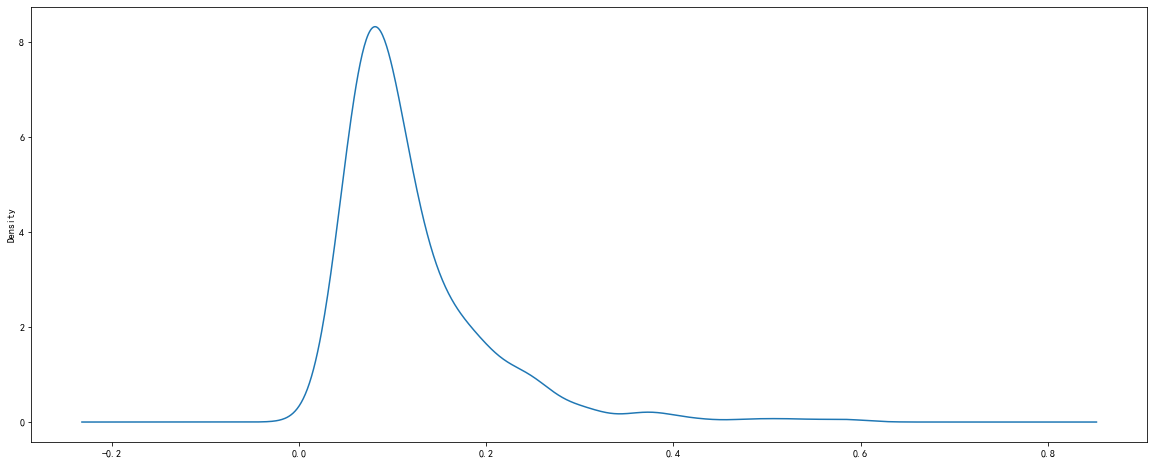

In [33]:
df_fin['换手率(%)'].plot(kind='kde',figsize=(20,8))
plt.show()

### 61.前一天收盘价与后一天收盘价的差值

In [34]:
df_fin['收盘价(元)'].diff()

0         NaN
1      0.1413
2      0.1237
3     -0.5211
4     -0.0177
        ...  
322   -0.0800
323   -0.1000
324   -0.0600
325   -0.0600
326   -0.1000
Name: 收盘价(元), Length: 309, dtype: float64

### 62.前一天收盘价与后一天收盘价变化率

In [36]:
df_fin['收盘价(元)'].pct_change()

0           NaN
1      0.008988
2      0.007799
3     -0.032598
4     -0.001145
         ...   
322   -0.005277
323   -0.006631
324   -0.004005
325   -0.004021
326   -0.006729
Name: 收盘价(元), Length: 309, dtype: float64

### 63.以5个数据作为滑动窗口，并在这5个数据上取均值

In [40]:
df_fin['收盘价(元)'].rolling(5).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4      15.69578
         ...   
322    15.14200
323    15.12800
324    15.07000
325    15.00000
326    14.92000
Name: 收盘价(元), Length: 309, dtype: float64

### 64.收盘5日均线，20日均线与原始数据绘制在一个图上

In [52]:
df_kline=df_fin[['日期','收盘价(元)']]

In [54]:
df_kline.set_index('日期',inplace=True)

In [82]:
df_kline

,收盘价(元)
日期,
2016-01-04,15.7205
2016-01-05,15.8618
2016-01-06,15.9855
2016-01-07,15.4644
2016-01-08,15.4467
...,...
2017-05-03,15.0800
2017-05-04,14.9800
2017-05-05,14.9200


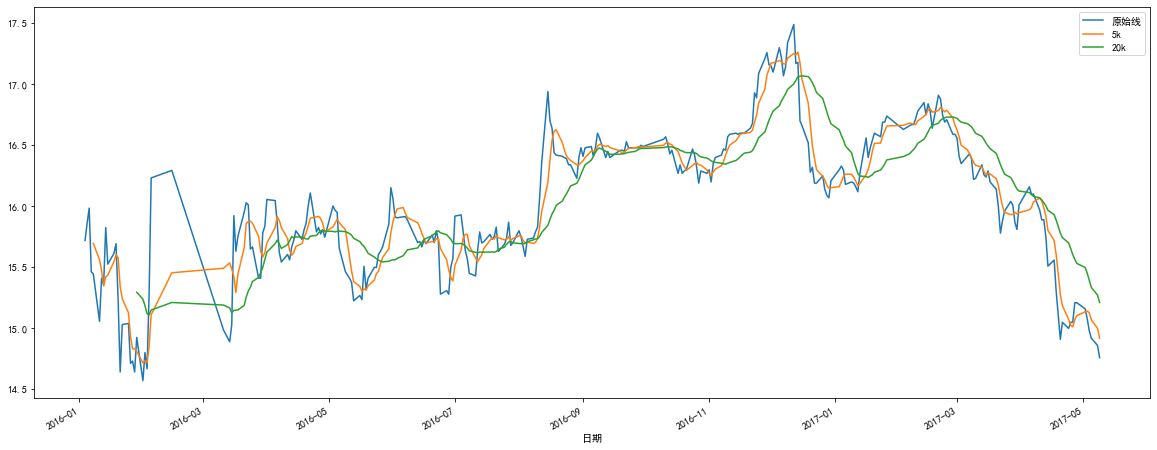

In [61]:
df_kline['收盘价(元)'].plot(kind='line',figsize=(20,8))
df_kline['收盘价(元)'].rolling(5).mean().plot(kind='line',figsize=(20,8))
df_kline['收盘价(元)'].rolling(20).mean().plot(kind='line',figsize=(20,8))
plt.legend(['原始线','5k','20k'])
plt.show()

### 65. 按周为采样规则，取一周的最大值

In [75]:
df_kline['收盘价(元)'].resample('W').max()

日期
2016-01-10    15.9855
2016-01-17    15.8265
2016-01-24    15.6940
2016-01-31    15.0405
2016-02-07    16.2328
               ...   
2017-04-16    15.9700
2017-04-23    15.5600
2017-04-30    15.2100
2017-05-07    15.1600
2017-05-14    14.8600
Freq: W-SUN, Name: 收盘价(元), Length: 71, dtype: float64

### 66.绘制原始数据和重采样数据

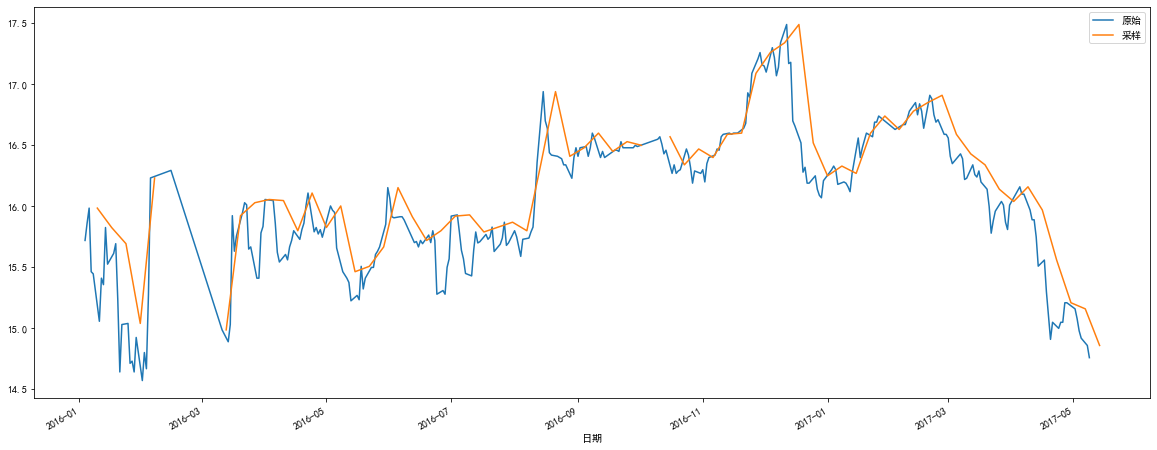

In [80]:
df_kline['收盘价(元)'].plot(kind='line',figsize=(20,8))
df_kline['收盘价(元)'].resample('W').max().plot(kind='line',figsize=(20,8))
plt.legend(['原始','采样'])
plt.show()

### 67.将数据往后移动五天

In [81]:
df_kline.shift(5)

,收盘价(元)
日期,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2017-05-03,15.05
2017-05-04,15.05
2017-05-05,15.21


### 68.使用expanding函数计算开盘价的移动窗口均值

In [86]:
df_fin['开盘价(元)']

0      16.1444
1      15.4644
2      15.8088
3      15.7205
4      15.6675
        ...   
322    15.1600
323    15.0700
324    14.9500
325    14.7800
326    14.6900
Name: 开盘价(元), Length: 309, dtype: float64

In [87]:
#表示最小从1个数据开始滚动，累加。

#故第一行数据不变，

#第二行数据=0（第一行）+1（第二行）

#第三行数据=0（第一行）+1（第二行）+2（第三行数据）

#第四行数据=0（第一行）+1（第二行）+2（第三行数据）+nan（第四行数据）

#以此类推！
df_fin['开盘价(元)'].expanding().mean()

0      16.144400
1      15.804400
2      15.805867
3      15.784525
4      15.761120
         ...    
322    16.041489
323    16.038314
324    16.034769
325    16.030695
326    16.026356
Name: 开盘价(元), Length: 309, dtype: float64

### 69.绘制原始数据与expanding移动平均的折线图

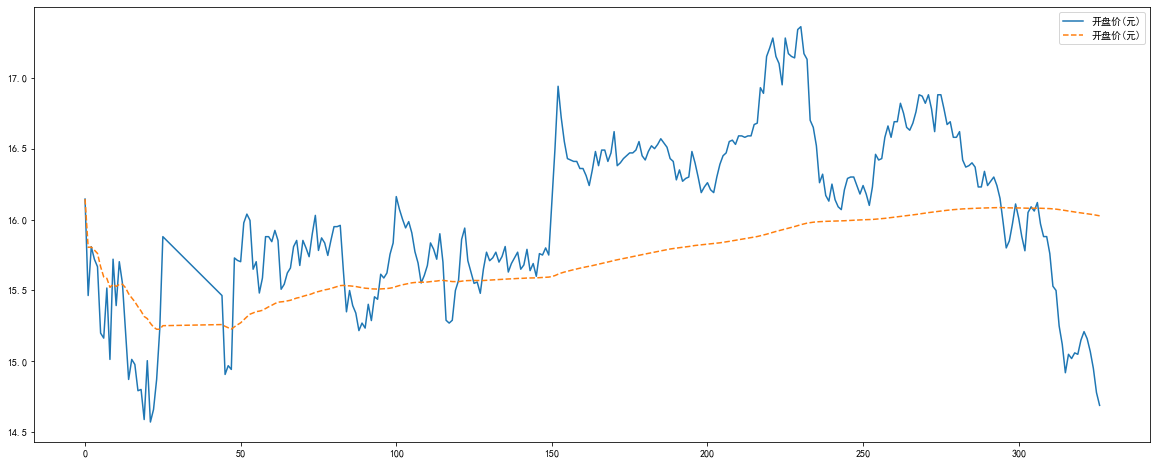

In [89]:
df_fin['开盘价(元)'].plot(kind='line',figsize=(20,8))
df_fin['开盘价(元)'].expanding().mean().plot(kind='line',figsize=(20,8),linestyle='--')
plt.legend()
plt.show()

### 70.计算布林线指标

In [116]:
df_boll_line=pd.DataFrame(df_kline['收盘价(元)'].rolling(20).mean())

In [117]:
df_boll_line.rename(columns={'收盘价(元)':'收盘价(元)_Rolling'},inplace=True)

In [118]:
df_boll_line

,收盘价(元)_Rolling
日期,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2017-05-03,15.4530
2017-05-04,15.3940
2017-05-05,15.3350


In [119]:
df_boll_line['Boll_upper']=df_kline['收盘价(元)'].rolling(20).mean()+2*df_kline['收盘价(元)'].rolling(20).mean().std()
df_boll_line['Boll_lower']=df_kline['收盘价(元)'].rolling(20).mean()-2*df_kline['收盘价(元)'].rolling(20).mean().std()

In [120]:
df_boll_line

,收盘价(元)_Rolling,Boll_upper,Boll_lower
日期,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN
...,...,...,...
2017-05-03,15.4530,16.4283,14.4777
2017-05-04,15.3940,16.3693,14.4187
2017-05-05,15.3350,16.3103,14.3597


In [121]:
df_boll_line['收盘价(元)']=df_kline['收盘价(元)']

In [122]:
df_boll_line

,收盘价(元)_Rolling,Boll_upper,Boll_lower,收盘价(元)
日期,,,,
2016-01-04,NaN,NaN,NaN,15.7205
2016-01-05,NaN,NaN,NaN,15.8618
2016-01-06,NaN,NaN,NaN,15.9855
2016-01-07,NaN,NaN,NaN,15.4644
2016-01-08,NaN,NaN,NaN,15.4467
...,...,...,...,...
2017-05-03,15.4530,16.4283,14.4777,15.0800
2017-05-04,15.3940,16.3693,14.4187,14.9800
2017-05-05,15.3350,16.3103,14.3597,14.9200


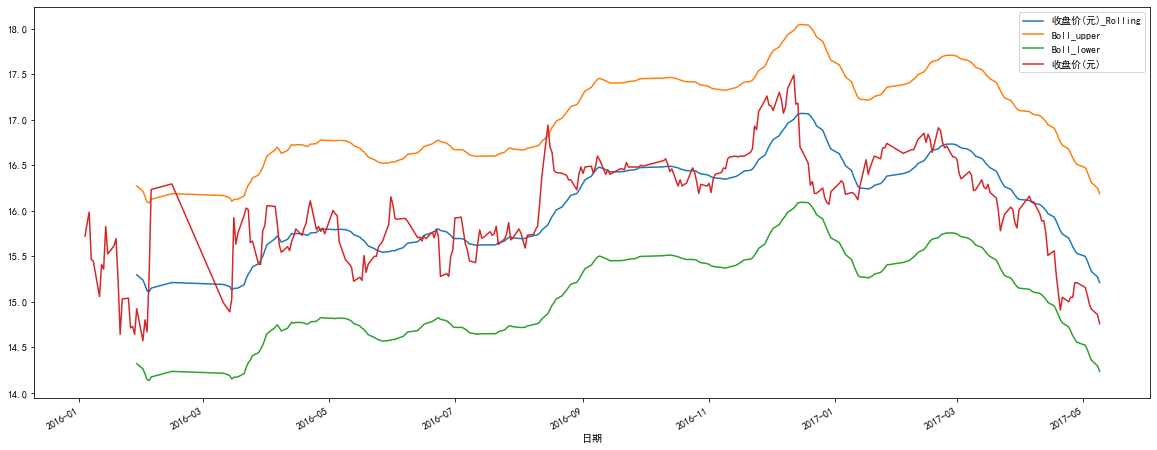

In [123]:
df_boll_line.plot(kind='line',figsize=(20,8))
plt.legend()
plt.show()

### 71.导入查看pandas与numpy版本

In [127]:
np.__version__
pd.__version__

'1.3.5'

### 72.从numpy数组创建DataFrame

In [130]:
np_data=np.random.randint(0,100,(10,5))

In [131]:
np_data

array([[30, 92, 38, 53, 32],
       [91, 52, 26, 26, 30],
       [76, 80, 53, 31,  9],
       [55, 99, 41, 57, 27],
       [68, 83, 28, 51, 24],
       [59, 47, 56,  3, 27],
       [99, 62, 68,  8, 18],
       [80, 17, 27, 41, 62],
       [82, 84, 16, 86, 66],
       [26, 24, 71, 33, 11]])

In [132]:
df_np=pd.DataFrame(np_data,columns=['A','B','C','D','E'])

In [133]:
df_np

,A,B,C,D,E
0,30,92,38,53,32
1,91,52,26,26,30
2,76,80,53,31,9
3,55,99,41,57,27
4,68,83,28,51,24
5,59,47,56,3,27
6,99,62,68,8,18
7,80,17,27,41,62
8,82,84,16,86,66
9,26,24,71,33,11


### 73.从numpy数组创建DataFrame

In [140]:
#正态分布
df_np2=pd.DataFrame(np.random.randn(9,1),columns=['F'])

In [138]:
df_np2

,F
0,-1.983979
1,-0.885701
2,-1.181878
3,-0.041799
4,-0.219995
5,-0.149966
6,2.207987
7,1.102790
8,-0.186986


### 74.将df_np,df_np2合成新的DataFrame

In [139]:
pd.concat([df_np,df_np2],axis=1)

,A,B,C,D,E,F
0,30,92,38,53,32,-1.983979
1,91,52,26,26,30,-0.885701
2,76,80,53,31,9,-1.181878
3,55,99,41,57,27,-0.041799
4,68,83,28,51,24,-0.219995
5,59,47,56,3,27,-0.149966
6,99,62,68,8,18,2.207987
7,80,17,27,41,62,1.102790
8,82,84,16,86,66,-0.186986
9,26,24,71,33,11,NaN


### 75.生成df_np3,并在行上合并df_np与df_np3

In [148]:
df_np3=np.random.randint(0,100,(1,5))

In [149]:
df_np3

array([[22,  2, 37, 39, 25]])

In [150]:
df_np3=pd.DataFrame(df_np3)

In [151]:
df_np3

,0,1,2,3,4
0,22,2,37,39,25


In [153]:
pd.concat([df_np,df_np3],axis=0,ignore_index=True)

,A,B,C,D,E,0,1,2,3,4
0,30.0,92.0,38.0,53.0,32.0,NaN,NaN,NaN,NaN,NaN
1,91.0,52.0,26.0,26.0,30.0,NaN,NaN,NaN,NaN,NaN
2,76.0,80.0,53.0,31.0,9.0,NaN,NaN,NaN,NaN,NaN
3,55.0,99.0,41.0,57.0,27.0,NaN,NaN,NaN,NaN,NaN
4,68.0,83.0,28.0,51.0,24.0,NaN,NaN,NaN,NaN,NaN
5,59.0,47.0,56.0,3.0,27.0,NaN,NaN,NaN,NaN,NaN
6,99.0,62.0,68.0,8.0,18.0,NaN,NaN,NaN,NaN,NaN
7,80.0,17.0,27.0,41.0,62.0,NaN,NaN,NaN,NaN,NaN
8,82.0,84.0,16.0,86.0,66.0,NaN,NaN,NaN,NaN,NaN
9,26.0,24.0,71.0,33.0,11.0,NaN,NaN,NaN,NaN,NaN


### 76. 查看上述合并结果所有数据的最小值，25%分位数，中位数，75%分位数，最大值

In [154]:
df_combine=pd.concat([df_np,df_np2],axis=1)

In [155]:
df_combine

,A,B,C,D,E,F
0,30,92,38,53,32,-0.345746
1,91,52,26,26,30,-0.325895
2,76,80,53,31,9,-0.881171
3,55,99,41,57,27,-0.001862
4,68,83,28,51,24,-1.095023
5,59,47,56,3,27,1.693749
6,99,62,68,8,18,0.738841
7,80,17,27,41,62,1.959789
8,82,84,16,86,66,0.769847
9,26,24,71,33,11,NaN


In [156]:
#方法1
df_combine.describe()

,A,B,C,D,E,F
count,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
mean,66.600000,64.000000,42.400000,38.900000,30.600000,0.279170
std,24.341095,28.425341,18.863251,24.501474,19.207637,1.080970
min,26.000000,17.000000,16.000000,3.000000,9.000000,-1.095023
25%,56.000000,48.250000,27.250000,27.250000,19.500000,-0.345746
50%,72.000000,71.000000,39.500000,37.000000,27.000000,-0.001862
75%,81.500000,83.750000,55.250000,52.500000,31.500000,0.769847
max,99.000000,99.000000,71.000000,86.000000,66.000000,1.959789


In [159]:
#方法2
np.percentile(a=df_combine,q=[0,25,50,75,100],axis=0)
#结果第一列为数据第一列的0分位，25分位，50分位，75分位，100分位数

array([[26.  , 17.  , 16.  ,  3.  ,  9.  ,   nan],
       [56.  , 48.25, 27.25, 27.25, 19.5 ,   nan],
       [72.  , 71.  , 39.5 , 37.  , 27.  ,   nan],
       [81.5 , 83.75, 55.25, 52.5 , 31.5 ,   nan],
       [99.  , 99.  , 71.  , 86.  , 66.  ,   nan]])

### 77.提取A列中不在B列出现的数字

In [168]:
df_combine[df_combine['A'].isin(df_combine['B'])==False]

,A,B,C,D,E,F
0,30,92,38,53,32,-0.345746
1,91,52,26,26,30,-0.325895
2,76,80,53,31,9,-0.881171
3,55,99,41,57,27,-0.001862
4,68,83,28,51,24,-1.095023
5,59,47,56,3,27,1.693749
8,82,84,16,86,66,0.769847
9,26,24,71,33,11,NaN


### 78.提取第一列和第二列出现频率最高的数字

In [178]:
Temp=df_combine['A'].append(df_combine['B'],ignore_index=True)

In [179]:
Temp

0     30
1     91
2     76
3     55
4     68
5     59
6     99
7     80
8     82
9     26
10    92
11    52
12    80
13    99
14    83
15    47
16    62
17    17
18    84
19    24
dtype: int32

In [180]:
Temp.value_counts()

99    2
80    2
30    1
92    1
84    1
17    1
62    1
47    1
83    1
52    1
26    1
91    1
82    1
59    1
68    1
55    1
76    1
24    1
dtype: int64

In [181]:
Temp.value_counts().index[0]

99

### 79.A列中可以整除5的数字的位置

In [186]:
np.where(df_combine['A']%5==0)

(array([0, 3, 7], dtype=int64),)

In [188]:
df_combine['A'].loc[np.where(df_combine['A']%5==0)]

0    30
3    55
7    80
Name: A, dtype: int32

### 80.计算A列数字前一个与后一个的差值

In [192]:
df_combine['A'].diff(1)

0     NaN
1    61.0
2   -15.0
3   -21.0
4    13.0
5    -9.0
6    40.0
7   -19.0
8     2.0
9   -56.0
Name: A, dtype: float64

### 81.将A B二列换位置

In [196]:
#区分于reset_index
df_combine.reindex(columns=['B','A'])

,B,A
0,92,30
1,52,91
2,80,76
3,99,55
4,83,68
5,47,59
6,62,99
7,17,80
8,84,82
9,24,26


### 获取汇率信息

In [226]:
#import libraries to handle request to api
import requests
import json
import pprint

In [240]:
# base currency or reference currency
base="USD"

# required currency for plot
out_curr="DM"

# exchange data from a date
start_date="2021-01-01"

# exchange data till a date
end_date="2021-01-01"

# api url for request 
url = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base,start_date,end_date,out_curr)
response = requests.get(url)

In [236]:
response

<Response [200]>

In [241]:
# retrive response in json format
data = response.json()

In [242]:
data

{'motd': {'msg': 'If you or your company use this project or like what we doing, please consider backing us so we can continue maintaining and evolving this project.',
  'url': 'https://exchangerate.host/#/donate'},
 'success': True,
 'timeseries': True,
 'base': 'USD',
 'start_date': '2021-01-01',
 'end_date': '2021-01-01',
 'rates': {'2021-01-01': {'AED': 3.6732,
   'AFN': 77.571731,
   'ALL': 101.322185,
   'AMD': 522.909949,
   'ANG': 1.794679,
   'AOA': 654.159937,
   'ARS': 85.115425,
   'AUD': 1.29985,
   'AWG': 1.8,
   'AZN': 1.7025,
   'BAM': 1.601236,
   'BBD': 2,
   'BDT': 84.632448,
   'BGN': 1.601211,
   'BHD': 0.377011,
   'BIF': 1941.945201,
   'BMD': 1,
   'BND': 1.328012,
   'BOB': 6.919071,
   'BRL': 5.1934,
   'BSD': 1,
   'BTC': 3.4e-05,
   'BTN': 73.428784,
   'BWP': 10.802856,
   'BYN': 2.612258,
   'BZD': 2.015329,
   'CAD': 1.273005,
   'CDF': 1971.040189,
   'CHF': 0.89,
   'CLF': 0.025749,
   'CLP': 710.499322,
   'CNH': 6.50503,
   'CNY': 6.532999,
   'COP': 

In [225]:
data["rates"]

{'2021-01-01': {'AED': 3.6732,
  'AFN': 77.571731,
  'ALL': 101.322185,
  'AMD': 522.909949,
  'ANG': 1.794679,
  'AOA': 654.159937,
  'ARS': 85.115425,
  'AUD': 1.29985,
  'AWG': 1.8,
  'AZN': 1.7025,
  'BAM': 1.601236,
  'BBD': 2,
  'BDT': 84.632448,
  'BGN': 1.601211,
  'BHD': 0.377011,
  'BIF': 1941.945201,
  'BMD': 1,
  'BND': 1.328012,
  'BOB': 6.919071,
  'BRL': 5.1934,
  'BSD': 1,
  'BTC': 3.4e-05,
  'BTN': 73.428784,
  'BWP': 10.802856,
  'BYN': 2.612258,
  'BZD': 2.015329,
  'CAD': 1.273005,
  'CDF': 1971.040189,
  'CHF': 0.89,
  'CLF': 0.025749,
  'CLP': 710.499322,
  'CNH': 6.50503,
  'CNY': 6.532999,
  'COP': 3461.474932,
  'CRC': 610.275845,
  'CUC': 0.999805,
  'CUP': 25.749997,
  'CVE': 90.549991,
  'CZK': 21.470199,
  'DJF': 178.902108,
  'DKK': 6.0929,
  'DOP': 58.17725,
  'DZD': 132.070378,
  'EGP': 15.842603,
  'ERN': 15.001451,
  'ETB': 39.551919,
  'EUR': 0.8213,
  'FJD': 2.0392,
  'FKP': 0.731368,
  'GBP': 0.731368,
  'GEL': 3.284999,
  'GGP': 0.731368,
  'GHS': 

In [203]:
data["rates"].items()

dict_items([('2021-01-01', {'CNY': 6.532999}), ('2021-01-02', {'CNY': 6.532999}), ('2021-01-03', {'CNY': 6.532998}), ('2021-01-04', {'CNY': 6.461598}), ('2021-01-05', {'CNY': 6.456301}), ('2021-01-06', {'CNY': 6.461801}), ('2021-01-07', {'CNY': 6.4782}), ('2021-01-08', {'CNY': 6.475402}), ('2021-01-09', {'CNY': 6.475399}), ('2021-01-10', {'CNY': 6.475452}), ('2021-01-11', {'CNY': 6.480799}), ('2021-01-12', {'CNY': 6.464002}), ('2021-01-13', {'CNY': 6.468101}), ('2021-01-14', {'CNY': 6.474599}), ('2021-01-15', {'CNY': 6.4808}), ('2021-01-16', {'CNY': 6.480801}), ('2021-01-17', {'CNY': 6.48085}), ('2021-01-18', {'CNY': 6.4925}), ('2021-01-19', {'CNY': 6.478998}), ('2021-01-20', {'CNY': 6.466499}), ('2021-01-21', {'CNY': 6.462098}), ('2021-01-22', {'CNY': 6.4819}), ('2021-01-23', {'CNY': 6.4819}), ('2021-01-24', {'CNY': 6.481899}), ('2021-01-25', {'CNY': 6.479799}), ('2021-01-26', {'CNY': 6.465199}), ('2021-01-27', {'CNY': 6.483602}), ('2021-01-28', {'CNY': 6.449498}), ('2021-01-29', {'CN

In [209]:
rates=[]
# extract dates and rates from each item of dictionary or json in the above created list
for i,j in data["rates"].items():
      rates.append([i,base,1,out_curr,j[out_curr]])

In [210]:
rates

[['2021-01-01', 'USD', 1, 'CNY', 6.532999],
 ['2021-01-02', 'USD', 1, 'CNY', 6.532999],
 ['2021-01-03', 'USD', 1, 'CNY', 6.532998],
 ['2021-01-04', 'USD', 1, 'CNY', 6.461598],
 ['2021-01-05', 'USD', 1, 'CNY', 6.456301],
 ['2021-01-06', 'USD', 1, 'CNY', 6.461801],
 ['2021-01-07', 'USD', 1, 'CNY', 6.4782],
 ['2021-01-08', 'USD', 1, 'CNY', 6.475402],
 ['2021-01-09', 'USD', 1, 'CNY', 6.475399],
 ['2021-01-10', 'USD', 1, 'CNY', 6.475452],
 ['2021-01-11', 'USD', 1, 'CNY', 6.480799],
 ['2021-01-12', 'USD', 1, 'CNY', 6.464002],
 ['2021-01-13', 'USD', 1, 'CNY', 6.468101],
 ['2021-01-14', 'USD', 1, 'CNY', 6.474599],
 ['2021-01-15', 'USD', 1, 'CNY', 6.4808],
 ['2021-01-16', 'USD', 1, 'CNY', 6.480801],
 ['2021-01-17', 'USD', 1, 'CNY', 6.48085],
 ['2021-01-18', 'USD', 1, 'CNY', 6.4925],
 ['2021-01-19', 'USD', 1, 'CNY', 6.478998],
 ['2021-01-20', 'USD', 1, 'CNY', 6.466499],
 ['2021-01-21', 'USD', 1, 'CNY', 6.462098],
 ['2021-01-22', 'USD', 1, 'CNY', 6.4819],
 ['2021-01-23', 'USD', 1, 'CNY', 6.4819],

In [211]:
df=pd.DataFrame(rates)

In [212]:
df

,0,1,2,3,4
0,2021-01-01,USD,1,CNY,6.532999
1,2021-01-02,USD,1,CNY,6.532999
2,2021-01-03,USD,1,CNY,6.532998
3,2021-01-04,USD,1,CNY,6.461598
4,2021-01-05,USD,1,CNY,6.456301
...,...,...,...,...,...
58,2021-02-28,USD,1,CNY,6.476680
59,2021-03-01,USD,1,CNY,6.465800
60,2021-03-02,USD,1,CNY,6.470599
61,2021-03-03,USD,1,CNY,6.467900


In [216]:
df.columns=["date","base","base_rate","out_curr","out_rate"]
df

,date,base,base_rate,out_curr,out_rate
0,2021-01-01,USD,1,CNY,6.532999
1,2021-01-02,USD,1,CNY,6.532999
2,2021-01-03,USD,1,CNY,6.532998
3,2021-01-04,USD,1,CNY,6.461598
4,2021-01-05,USD,1,CNY,6.456301
...,...,...,...,...,...
58,2021-02-28,USD,1,CNY,6.476680
59,2021-03-01,USD,1,CNY,6.465800
60,2021-03-02,USD,1,CNY,6.470599
61,2021-03-03,USD,1,CNY,6.467900


In [251]:
#import libraries to handle request to api
import requests
import json
import pprint
# exchange data from a date
start_date="2023-01-01"

# exchange data till a date
end_date="2023-01-01"

# base currency or reference currency
base="USD"

# required currency for plot
out_curr_list=["AED","AUD","BDT","BGN","BRL","CAD","CHF","CZK","CNY","DKK","DM","EUR","GBP","HKD","IDR","INR","JPY","KRW","LKR","LVL","MYR","NOK","PLN","RON","SEK","SGD","THB","TRY","TWD","USD"
              ,"VND","ZAR","NZD","ILS","MOP","PHP","RUB","MMK","MXN","NPR","PKR","SAR","CLP","HUF","KES","KHR","BHD"]
# create an empty array to store date and exchange rates
rates=[]
for out_curr in out_curr_list:

    # api url for request 
    url = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base,start_date,end_date,out_curr)
    response = requests.get(url)

    # retrive response in json format
    data = response.json()

    # extract dates and rates from each item of dictionary or json in the above created list
    for i,j in data["rates"].items():
        try:
            rates.append([i,base,1,out_curr,j[out_curr]])
        except:
            print(out_curr+"不存在汇率信息")
# print(rates)
# create an data frame
import pandas as pd
df=pd.DataFrame(rates)
# define column names explicitely
# df.columns=[base,out_curr,"date","rate"]
df.columns=["date","base","base_rate","out_curr","out_rate"]
df

DM不存在汇率信息
LVL不存在汇率信息


,date,base,base_rate,out_curr,out_rate
0,2023-01-01,USD,1,AED,3.672599
1,2023-01-01,USD,1,AUD,1.465655
2,2023-01-01,USD,1,BDT,103.146520
3,2023-01-01,USD,1,BGN,1.827692
4,2023-01-01,USD,1,BRL,5.285838
5,2023-01-01,USD,1,CAD,1.356539
6,2023-01-01,USD,1,CHF,0.922563
7,2023-01-01,USD,1,CZK,22.550714
8,2023-01-01,USD,1,CNY,6.897654
9,2023-01-01,USD,1,DKK,6.953372
